<h1 align='center'>Matrix Multiplication to Find Connecting Flights</i></h1>

<h2>Prerequisites</h2>
<ul>
    <li>The standard notions of matrix multiplication</li>
</ul>

<h2>Introduction</h2>

The problem we will tackle in this article is rather straightforward: how many connecting flights do we need to take to get home. That is, assuming there are no direct flights, how many different airports do we need to travel through to arrive at our destination.  Is there a way to get there in two flights?  If not, do we have multiple options for three flights? If we are actually booking the flight for a sibling, what is the longest path you can choose without repeating an airport (sidenote with jargon: this is an NP problem, so I certainly won't tackle it below)? Your answer, certainly, is "let Expedia tell us."  Yes, true.  But, as you read the below, I encourage you to try and generalize the problem at hand.  I actually want to skip making these generalizations for you, as I am confident that you will readily find that we aren't really discussing airports, but rather that we are discussing the ways in which objects are connected.  Furthermore, the linear algebra at play is rather straightforward; so it is safe to partition some of your RAM to ideas beyond the article.

<h2>The Problem</h2>

Say we travel to San Diego for winter break (it is presently winter, so some sun would certainly be nice), and we need to return to Newark.  Let's assume, to begin with for simplicity, that only six airports exist in the country: San Diego, Denver, Dallas, Chicago, Washington D.C., and Newark.  We will use their airport codes for easier reference: San Diego = SAN, Denver = DEN, Newark = EWR, Dallas = DAL, Chicago = ORD, Washington D.C. = DCA.  Let's also assume that our airport infrastructure is lacking and only certain airports offer flights between each other.

To begin, let's list these options using plain language:
<ul>
    <li>SAN offers flights to DEN </li>
    <li>DEN offers flights to ORD and DAL </li>
    <li>DAL offers flights to DEN, ORD, EWR, and DCA </li>
    <li>ORD offers flights to DEN, DAL, and EWR </li>
    <li>DCA offers flights to DAL and EWR </li>
    <li>EWR offers flights to ORD, DAL, and DCA </li>
</ul>
Hopefully, this reads a bit like word-salad, and it is not at all obvious at a glance how we can get home.  It would be much better to represent these connections using a graph.  Each dot on our graph (a vertex) will represent an airport, and each line (an edge) will indicate that there is a flight between the two airports it connects.  As such, we can visualize the above information:

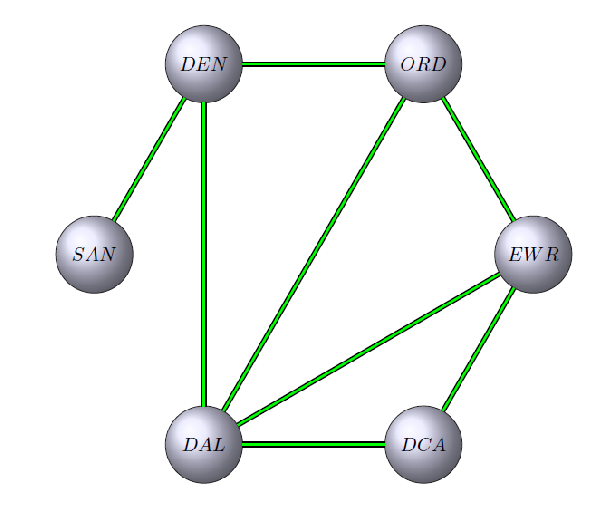

In [10]:
import matplotlib.pyplot as plt

image_file = 'smallgraph.PNG'
small = plt.imread(image_file) 
plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(small)

This provides a convenient way to visualize the task at hand. We can readily see that SAN and EWR are not connected, telling us that their is no direct flight.  Furthermore, it is rather simple to trace the possible paths between our starting and end points.  For example, we can readily read off that we could travel through DEN and ORD or we could travel through DEN and DAL.

It is important to note that because we are only concerned here with the connections between airports, rather than say the total distance, time travelled or total cost, we can draw our graph so that it is not to scale.  There are indeed methods to include information like distance, time, or cost, but these are beyond the scope of what I can accomplish here.

Now that we have visualized the problem, and walked ourselves through a potential solution, let's intoduce some linear algebra to quantify our findings.

<h2>Finding Solutions at a Glance</h2>
While the above graph is easy enough to analyze visually, we can use an adjacency matrix to quantify the same relationships.  This matrix will include an entry of 0 if two airports are not connected, and an entry of 1 if two airports are connected.  The adjacency matrix for the above graph is given by:

$$
\begin{array}{r|cccccc}
& SAN & DEN & DAL & ORD & DCA & EWR \\
\hline
SAN      & 0  & 1  & 0  & 0  & 0  & 0  \\
DEN      & 1  & 0  & 1  & 1  & 0  & 0  \\
DAL      & 0  & 1  & 0  & 1  & 1  & 1  \\
ORD      & 0  & 1  & 1  & 0  & 0  & 1  \\
DCA      & 0  & 0  & 1  & 0  & 0  & 1  \\
EWR      & 0  & 0  & 1  & 1  & 1  & 0  \\
\end{array}
$$

Let's call this matrix S, and we note that S is a 6x6 matrix, corresponding to the 6 airports of our problem (I will keep the column and row headers as they make our results easier to interpret, but they do not play a role in the computations we will perform). Each entry, again, gives us the existence of an edge on our graph.  For example, $s_{2,4} = s_{DEN,ORD} = 1$, indicating that there is a flight between DEN and ORD.  You will notice that our matrix is symmetric, i.e., $s_{i,j} = s_{j,i}$.  This should make intuitive sense, as if there is a flight from DEN to ORD, we are assuming there is a return flight from ORD to DEN, i.e., $s_{DEN,ORD} = s_{ORD,DEN}$.  You will also note that if you take the sum of the entries in a vector (either the row or the column, as they are the same in this space), the result describes how many airports to which that airport vector is connected.  For example $$\sum_{j=1}^{6} s_{2,j} = 2$$ indicating that DEN is connected to two airports.

For the problem at hand we note that $s_{SAN,EWR} = 0$, which indicates that there are no direct flights home. Now, we would like to determine if there are any two-step flights.  To rephrase the question in more general terminology, we would like to see if there is a walk of length 2 from vertex SAN to vertex EWR.  Perhaps rather surprisingly, or at least very interestingly, this information is contained in $S^2$, i.e., $S \times S$:
$$
S^2 = 
\begin{array}{r|cccccc}
& SAN & DEN & DAL & ORD & DCA & EWR \\
\hline
SAN      & 1  & 0  & 1  & 1  & 0  & 0  \\
DEN      & 0  & 3  & 1  & 1  & 1  & 2  \\
DAL      & 1  & 1  & 4  & 2  & 1  & 2  \\
ORD      & 1  & 1  & 2  & 3  & 2  & 1  \\
DCA      & 0  & 1  & 1  & 2  & 2  & 1  \\
EWR      & 0  & 2  & 2  & 1  & 1  & 3  \\
\end{array}
$$

This tells us the number of different walks of length 2 that exist between two of our airports. For example, we can see that there are two ways to travel between DEN and EWR with a walk of length 2.  If we look back at our graph, we see that these are DEN-ORD-EWR and DEN-DAL-EWR.  To the point for our problem, we see that there is an entry of 0 for SAN-EWR, indicating that there is no way to get there in exactly two flights.

To be clear, this counting of paths is consistent with $S$ above.  I specifically didn't indicate that the entries were a binary, off/on, because it is more accurate to say that the entries count the walks of length one between two vertices.  For vertices with an edge between them, there is indeed one path.

So, we have shown that there are no walks of length one (direct flight) nor walks of length two (two flights) between SAN and EWR.  Naturally, we should next check if there are any walks of length three (three flights).  I imagine you can guess how this will be accomplished.  Yes, $S^3$, i.e., $S \times S \times S$: 
$$
S^3 = 
\begin{array}{r|cccccc}
& SAN & DEN & DAL & ORD & DCA & EWR \\
\hline
SAN      & 0 & 3 & 1 & 1 & 1 & 2  \\
DEN      & 3 & 2 & 7 & 6 & 3 & 3  \\
DAL      & 1 & 7 & 6 & 7 & 6 & 7  \\
ORD      & 1 & 6 & 7 & 4 & 3 & 7  \\
DCA      & 1 & 3 & 6 & 3 & 2 & 5  \\
EWR      & 2 & 3 & 7 & 7 & 5 & 4  \\
\end{array}
$$

And, finally, we have a nonzero entry for SAN-EWR.  Indeed, we have two options for how to get home, as we discussed above.

But but but, I can hear you saying, what was the point when we could just look at the graph in the first place?  Let's make the problem a little larger, to get a hint at the real complexity.

<h2>The Problem, A Little Larger</h2>

Let's triple the size of the problem and assume the country has 18 airports.  Rather than listing all the flight options using plain language (which was, hopefully, clearly the worst of the three options above), let's jump right to the graph:

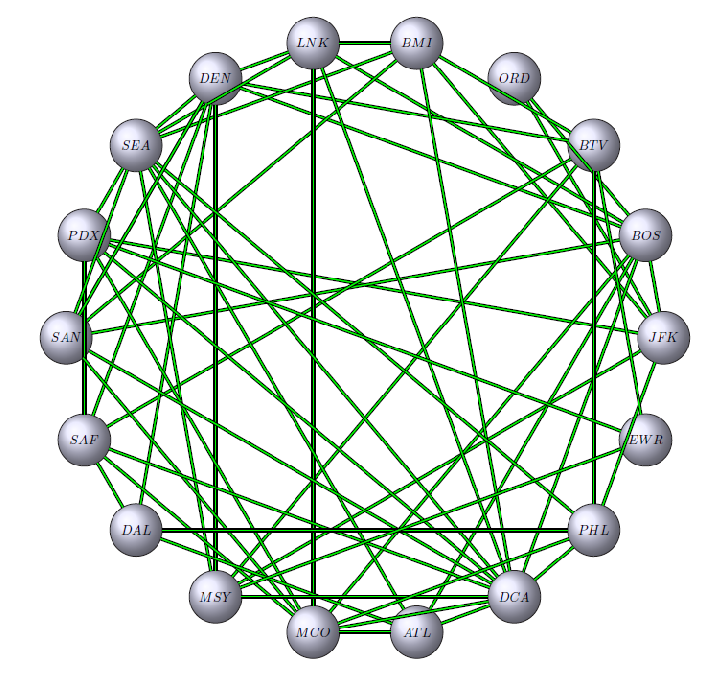

In [12]:
image_file2 = 'largegraph.PNG'
large = plt.imread(image_file2) 
plt.figure(figsize=(12,12))
plt.axis('off')
plt.imshow(large)

I think it's fair to say that the shortest path between SAN and EWR doesn't exactly jump off the page.  At a glance, it's hard enough to discern if SAN and EWR are connected. While we could spend our time unraveling this mess or perhaps get a little more creative with spacing or coloring, the point here is that the adjacency matrix is just as easy to read as the one above:

$$
L = 
\begin{array}{r|cccccccccccccccccc}
& JFK & BOS & BTV & ORD & BMI & LNK & DEN & SEA & PDX & SAN & SAF & DAL & MSY & MCO & ATL & DCA & PHL & EWR \\
\hline
JFK & 0 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0  \\
BOS & 1 & 0 & 0 & 1 & 0 & 1 & 1 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 1 & 1 & 0 & 0  \\  
BTV & 0 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 1 & 1  \\  
ORD & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0  \\  
BMI & 1 & 0 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0  \\  
LNK & 0 & 1 & 0 & 0 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & 0  \\  
DEN & 0 & 1 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 & 0  \\  
SEA & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 0 & 1 & 1 & 0 & 0 & 1 & 0 & 1 & 1 & 1 & 0  \\  
PDX & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 1  \\  
SAN & 0 & 1 & 0 & 0 & 1 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & 0  \\  
SAF & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 0  \\  
DAL & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 1 & 0  \\  
MSY & 1 & 0 & 1 & 0 & 0 & 0 & 1 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 1  \\ 
MCO & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 1 & 1 & 1 & 0 & 0 & 0 & 1 & 1 & 1 & 0  \\  
ATL & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 0  \\  
DCA & 0 & 1 & 0 & 0 & 1 & 1 & 0 & 1 & 1 & 1 & 1 & 0 & 1 & 1 & 1 & 0 & 1 & 0  \\  
PHL & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 1 & 0 & 1 & 0 & 0  \\  
EWR & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0  \\
\end{array}
$$

And, we see that the entry for SAN-EWR is zero.  Thus, there are no direct flights.  

Next, we should check for a walk of length 2, by inspecting $L^2$:

$$
L^2 = 
\begin{array}{r|cccccccccccccccccc}
& JFK & BOS & BTV & ORD & BMI & LNK & DEN & SEA & PDX & SAN & SAF & DAL & MSY & MCO & ATL & DCA & PHL & EWR \\
\hline
JFK & 6 & 1 & 3 & 1 & 0 & 2 & 2 & 4 & 0 & 2 & 1 & 1 & 0 & 3 & 1 & 5 & 0 & 2  \\
BOS & 1 & 8 & 1 & 1 & 4 & 3 & 2 & 5 & 3 & 3 & 3 & 2 & 3 & 4 & 2 & 4 & 3 & 0  \\
BTV & 3 & 1 & 6 & 0 & 0 & 2 & 2 & 4 & 2 & 2 & 1 & 3 & 2 & 2 & 0 & 4 & 0 & 1  \\
ORD & 1 & 1 & 0 & 2 & 1 & 1 & 1 & 0 & 1 & 1 & 0 & 0 & 1 & 1 & 1 & 1 & 1 & 0  \\ 
BMI & 0 & 4 & 0 & 1 & 6 & 2 & 4 & 3 & 3 & 2 & 2 & 0 & 4 & 3 & 2 & 3 & 4 & 1  \\  
LNK & 2 & 3 & 2 & 1 & 2 & 6 & 2 & 3 & 3 & 6 & 3 & 1 & 3 & 2 & 4 & 4 & 3 & 0  \\  
DEN & 2 & 2 & 2 & 1 & 4 & 2 & 8 & 3 & 2 & 2 & 2 & 1 & 2 & 4 & 3 & 6 & 3 & 2  \\  
SEA & 4 & 5 & 4 & 0 & 3 & 3 & 3 & 9 & 1 & 3 & 3 & 3 & 2 & 6 & 1 & 7 & 1 & 2  \\  
PDX & 0 & 3 & 2 & 1 & 3 & 3 & 2 & 1 & 6 & 3 & 2 & 1 & 4 & 2 & 3 & 3 & 4 & 0  \\  
SAN & 2 & 3 & 2 & 1 & 2 & 6 & 2 & 3 & 3 & 6 & 3 & 1 & 3 & 2 & 4 & 4 & 3 & 0  \\  
SAF & 1 & 3 & 1 & 0 & 2 & 3 & 2 & 3 & 2 & 3 & 6 & 1 & 3 & 2 & 3 & 2 & 4 & 2  \\  
DAL & 1 & 2 & 3 & 0 & 0 & 1 & 1 & 3 & 1 & 1 & 1 & 4 & 1 & 3 & 0 & 3 & 0 & 0  \\ 
MSY & 0 & 3 & 2 & 1 & 4 & 3 & 2 & 2 & 4 & 3 & 3 & 1 & 6 & 1 & 2 & 1 & 4 & 1  \\  
MCO & 3 & 4 & 2 & 1 & 3 & 2 & 4 & 6 & 2 & 2 & 2 & 3 & 1 & 8 & 2 & 7 & 1 & 1  \\  
ATL & 1 & 2 & 0 & 1 & 2 & 4 & 3 & 1 & 3 & 4 & 3 & 0 & 2 & 2 & 5 & 3 & 4 & 0  \\  
DCA & 5 & 4 & 4 & 1 & 3 & 4 & 6 & 7 & 3 & 4 & 2 & 3 & 1 & 7 & 3 & 11 & 2 & 2  \\  
PHL & 0 & 3 & 0 & 1 & 4 & 3 & 3 & 1 & 4 & 3 & 4 & 0 & 4 & 1 & 4 & 2 & 6 & 1  \\  
EWR & 2 & 0 & 1 & 0 & 1 & 0 & 2 & 2 & 0 & 0 & 2 & 0 & 1 & 1 & 0 & 2 & 1 & 3  \\
\end{array}
$$

Again, we see that the entry for SAN-EWR is zero.  Thus, there are no two-flight options.  

Next, we should check for a walk of length 3, by inspecting $L^3$:

$$
L^3 = 
\begin{array}{r|cccccccccccccccccc}
& JFK & BOS & BTV & ORD & BMI & LNK & DEN & SEA & PDX & SAN & SAF & DAL & MSY & MCO & ATL & DCA & PHL & EWR \\
\hline
JFK & 2 & 22 & 5 & 7 & 22 & 15 & 14 & 12 & 21 & 15 & 14 & 4 & 22 & 12 & 14 & 14 & 22 & 3  \\
BOS & 22 & 20 & 15 & 9 & 17 & 27 & 28 & 27 & 17 & 27 & 16 & 10 & 13 & 29 & 23 & 41 & 17 & 7  \\
BTV & 5 & 15 & 6 & 4 & 21 & 13 & 21 & 14 & 15 & 13 & 19 & 3 & 20 & 12 & 14 & 16 & 22 & 10  \\
ORD & 7 & 9 & 4 & 2 & 4 & 5 & 4 & 9 & 3 & 5 & 4 & 3 & 3 & 7 & 3 & 9 & 3 & 2  \\ 
BMI & 22 & 17 & 21 & 4 & 10 & 23 & 17 & 30 & 12 & 23 & 13 & 12 & 11 & 22 & 13 & 35 & 9 & 7  \\  
LNK & 15 & 27 & 13 & 5 & 23 & 16 & 27 & 33 & 14 & 16 & 14 & 12 & 13 & 32 & 13 & 38 & 14 & 8  \\  
DEN & 14 & 28 & 21 & 4 & 17 & 27 & 16 & 32 & 19 & 27 & 23 & 16 & 23 & 22 & 16 & 29 & 18 & 6  \\  
SEA & 12 & 27 & 14 & 9 & 30 & 33 & 32 & 24 & 31 & 33 & 24 & 8 & 29 & 24 & 30 & 37 & 33 & 7  \\  
PDX & 21 & 17 & 15 & 3 & 12 & 14 & 19 & 31 & 8 & 14 & 16 & 11 & 8 & 27 & 10 & 34 & 9 & 12  \\  
SAN & 15 & 27 & 13 & 5 & 23 & 16 & 27 & 33 & 14 & 16 & 14 & 12 & 13 & 32 & 13 & 38 & 14 & 8  \\  
SAF & 14 & 16 & 19 & 4 & 13 & 14 & 23 & 24 & 16 & 14 & 10 & 15 & 11 & 26 & 11 & 34 & 10 & 6  \\  
DAL & 4 & 10 & 3 & 3 & 12 & 12 & 16 & 8 & 11 & 12 & 15 & 2 & 11 & 9 & 15 & 13 & 17 & 5  \\ 
MSY & 22 & 13 & 20 & 3 & 11 & 13 & 23 & 29 & 8 & 13 & 11 & 11 & 8 & 23 & 8 & 35 & 7 & 12 \\  
MCO & 12 & 29 & 12 & 7 & 22 & 32 & 22 & 24 & 27 & 32 & 26 & 9 & 23 & 22 & 28 & 33 & 29 & 5  \\  
ATL & 14 & 23 & 14 & 3 & 13 & 13 & 16 & 30 & 10 & 13 & 11 & 15 & 8 & 28 & 8 & 32 & 7 & 5  \\  
DCA & 14 & 41 & 16 & 9 & 35 & 38 & 29 & 37 & 34 & 38 & 34 & 13 & 35 & 33 & 32 & 40 & 37 & 8 \\  
PHL & 22 & 17 & 22 & 3 & 9 & 14 & 18 & 33 & 9 & 14 & 10 & 17 & 7 & 29 & 7 & 37 & 4 & 8  \\  
EWR & 3 & 7 & 10 & 2 & 7 & 8 & 6 & 7 & 12 & 8 & 6 & 5 & 12 & 5 & 5 & 8 & 8 & 2  \\
\end{array}
$$

And, we find that there are eight options available to us.




<h2>Closing Thoughts</h2>
While the first problem was small enough that we could visually find the answer, even scaling the problem to 18 airports made the graph rather inpenetrable to inspection.  There are a little over 15,000 airports in the U.S., and trying to <a href="https://jamiecornelsen.files.wordpress.com/2012/08/koblin-flight-patterns-1210-lg-43918985.jpg" target="_blank">visualize</a> all of the various paths, while artistically pleasing, is intractable.  But, we have seen while graphs become muddy when new complexity is added, their adjacency matrices simply become longer.  We also don't really need to see the entire matrix; we could simply <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.matrix.item.html" target="_blank">request</a> the entry in which we are interested.  

Admittedly, there is one very unsatisfying aspect to the work we did above: we don't know what the eights paths are for the larger problem.  While we know that they exist, this method does not actually list them explicitly.  To be clear, this doesn't mean that the method is without value; it just means that it is only a preliminary step.  But, using graphs to solve problems like the above is a <a href="https://en.wikipedia.org/wiki/Graph_theory" target="_blank">field unto itself</a>, using tools from pure math and computer science.  Beyond this, using linear algebra to quantify the attributes of graphs is another <a href="https://en.wikipedia.org/wiki/Spectral_graph_theory" target="_blank">field unto itself</a>.  It is fantastic that the depths of those fields are not reduced to matrix multiplication, as there is still plenty for us to learn and explore.

Furthermore, as we were working through the ideas above, I hope that you were thinking that I should have chosen "such-and-such" example of connections to really make this interesting.  Perhaps, I should have used how many people you would have to meet to get an introduction to a person you find interesting, or how many Wikipedia articles you would need to click through to get from one topic to another, or how many species separate crows and salamanders in a food web, or any number of other examples.  I know mathematicians love this line, but graphs and the networks to which they are associated are, honestly, everywhere.  Choose your favorite and redo the work above.

Let me know what you learn (really, send me an email; I love this stuff).

<h2>Appendix: Tools Used</h2>

I wasn't able to find a nice Python solution for drawing graphs.  I could abuse matplotlib and treat it like a canvas, but this seems rather tedious and beside the point.  Certainly, solutions like Cytoscape exist, but the LaTex approach below seems sufficient for the task at hand.  This is an issue that deserves more exploration on my part.

Jupyter doesn't seem to like importing Latex packages, so I rendered this elsewhere and am listing the commands here for future reference and adjustment.

For the first problem:
    \documentclass{article}
    \usepackage[utf8]{inputenc}
    \usepackage[usenames,dvipsnames]{xcolor}
    \usepackage{tkz-berge,fullpage}
    \definecolor{fondpaille}{cmyk}{0,0,0.1,0}
    \pagecolor{White}
    \color{Black} 
    \thispagestyle{empty}
    \begin{document}
    \begin{center}
    \begin{tikzpicture}
       \tikzset{VertexStyle/.style= {shape        = circle,
                                      shading      = ball,
                                      ball color   = Blue!10,
                                      minimum size = 40pt,
                                      draw}}
       \tikzset{EdgeStyle/.style= {thick,
                                    double          = green,
                                    double distance = 1pt}}
       \SetVertexNoLabel
       \grEmptyCycle[RA=4]{6}
       \AssignVertexLabel{a}{$EWR$,$ORD$,$DEN$,$SAN$,$DAL$,$DCA$}
       \EdgeFromOneToSel{a}{a}{3}{2}
       \EdgeFromOneToSel{a}{a}{1}{0,4}
       \EdgeFromOneToSel{a}{a}{2}{1,4}
       \EdgeFromOneToSel{a}{a}{4}{0,5}
       \EdgeFromOneToSel{a}{a}{5}{0}

    \end{tikzpicture}
    \end{center}
    \end{document}

For the second problem:
\documentclass{article}
    \usepackage[utf8]{inputenc}
    \usepackage[usenames,dvipsnames]{xcolor}
    \usepackage{tkz-berge,fullpage}
    \definecolor{fondpaille}{cmyk}{0,0,0.1,0}
    \pagecolor{White}
    \color{Black} 
    \thispagestyle{empty}
    \begin{document}
    \begin{center}
    \begin{tikzpicture}
       \tikzset{VertexStyle/.style= {shape        = circle,
                                      shading      = ball,
                                      ball color   = Blue!10,
                                      minimum size = 40pt,
                                      draw}}
       \tikzset{EdgeStyle/.style= {thick,
                                    double          = green,
                                    double distance = 1pt}}
       \SetVertexNoLabel
       \grEmptyCycle[RA=8]{18}
       \AssignVertexLabel{a}{$JFK$,$BOS$,$BTV$,$ORD$,$BMI$,$LNK$,$DEN$,$SEA$,$PDX$,$SAN$,$SAF$,$DAL$,$MSY$,$MCO$,$ATL$,$DCA$,$PHL$,$EWR$,}
       \EdgeFromOneToSel{a}{a}{0}{1,3,4,8,12,16}
       \EdgeFromOneToSel{a}{a}{1}{3,5,6,9,13,14,15}
       \EdgeFromOneToSel{a}{a}{2}{4,6,10,12,16,17}
       \EdgeFromOneToSel{a}{a}{4}{5,7,9,15}
       \EdgeFromOneToSel{a}{a}{5}{6,7,13,15}
       \EdgeFromOneToSel{a}{a}{6}{7,9,10,11,12}
       \EdgeFromOneToSel{a}{a}{7}{8,12,14,15,16}
       \EdgeFromOneToSel{a}{a}{8}{10,13,15,17}
       \EdgeFromOneToSel{a}{a}{9}{6,7,13,15}
       \EdgeFromOneToSel{a}{a}{10}{11,13,15}
       \EdgeFromOneToSel{a}{a}{11}{14,16}
       \EdgeFromOneToSel{a}{a}{12}{15,17}
       \EdgeFromOneToSel{a}{a}{13}{14,15,16}
       \EdgeFromOneToSel{a}{a}{14}{15}
       \EdgeFromOneToSel{a}{a}{15}{16}
    \end{tikzpicture}
    \end{center}
    \end{document}


To perform the matrix multiplication:

In [4]:
import numpy as np

s=[[0,1,0,0,0,0],
   [1,0,1,1,0,0],
   [0,1,0,1,1,1],
   [0,1,1,0,0,1],
   [0,0,1,0,0,1],
   [0,0,1,1,1,0],
   
   ]
s_2 = np.matmul(s, s)
print(s_2)

[[1 0 1 1 0 0]
 [0 3 1 1 1 2]
 [1 1 4 2 1 2]
 [1 1 2 3 2 1]
 [0 1 1 2 2 1]
 [0 2 2 1 1 3]]


In [6]:
s_3 = np.matmul(s, s_2)
print(s_3)

[[0 3 1 1 1 2]
 [3 2 7 6 3 3]
 [1 7 6 7 6 7]
 [1 6 7 4 3 7]
 [1 3 6 3 2 5]
 [2 3 7 7 5 4]]


Because of the number of matrices used in the above, I'm going to be somewhat lazy (efficient?) and skip typing everything out:

In [2]:
#feed in a numpy array and format to latex bmatrix
def latex_matrix(array):
    rows = str(array).replace('[', '').replace(']', '').replace('0.5','\\frac{1}{2}').replace('0.75','\\frac{3}{4}').replace('0.25','\\frac{1}{4}').replace('.','').splitlines()
    result = ['\\begin{bmatrix}']
    result += ['  ' + ' & '.join(row.split()) + '\\\\' for row in rows]
    result +=  ['\\end{bmatrix}']
    return '\n'.join(result)

In [7]:
latex_matrix(s_3)

'\\begin{bmatrix}\n  0 & 3 & 1 & 1 & 1 & 2\\\\\n  3 & 2 & 7 & 6 & 3 & 3\\\\\n  1 & 7 & 6 & 7 & 6 & 7\\\\\n  1 & 6 & 7 & 4 & 3 & 7\\\\\n  1 & 3 & 6 & 3 & 2 & 5\\\\\n  2 & 3 & 7 & 7 & 5 & 4\\\\\n\\end{bmatrix}'

And, we repeat this work for the larger problem:

In [13]:
l = [[0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0],
     [1,0,0,1,0,1,1,0,0,1,0,0,0,1,1,1,0,0],
     [0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,1],
     [1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
     [1,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0],
     [0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0],
     [0,1,1,0,0,1,0,1,0,1,1,1,1,0,0,0,0,0],
     [0,0,0,0,1,1,1,0,1,1,0,0,1,0,1,1,1,0],
     [1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1],
     [0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0],
     [0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0],
     [0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0],
     [1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,1],
     [0,1,0,0,0,1,0,0,1,1,1,0,0,0,1,1,1,0],
     [0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0],
     [0,1,0,0,1,1,0,1,1,1,1,0,1,1,1,0,1,0],
     [1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0],
     [0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0]
     ]
l_2 = np.matmul(l, l)
print(l_2)

[[ 6  1  3  1  0  2  2  4  0  2  1  1  0  3  1  5  0  2]
 [ 1  8  1  1  4  3  2  5  3  3  3  2  3  4  2  4  3  0]
 [ 3  1  6  0  0  2  2  4  2  2  1  3  2  2  0  4  0  1]
 [ 1  1  0  2  1  1  1  0  1  1  0  0  1  1  1  1  1  0]
 [ 0  4  0  1  6  2  4  3  3  2  2  0  4  3  2  3  4  1]
 [ 2  3  2  1  2  6  2  3  3  6  3  1  3  2  4  4  3  0]
 [ 2  2  2  1  4  2  8  3  2  2  2  1  2  4  3  6  3  2]
 [ 4  5  4  0  3  3  3  9  1  3  3  3  2  6  1  7  1  2]
 [ 0  3  2  1  3  3  2  1  6  3  2  1  4  2  3  3  4  0]
 [ 2  3  2  1  2  6  2  3  3  6  3  1  3  2  4  4  3  0]
 [ 1  3  1  0  2  3  2  3  2  3  6  1  3  2  3  2  4  2]
 [ 1  2  3  0  0  1  1  3  1  1  1  4  1  3  0  3  0  0]
 [ 0  3  2  1  4  3  2  2  4  3  3  1  6  1  2  1  4  1]
 [ 3  4  2  1  3  2  4  6  2  2  2  3  1  8  2  7  1  1]
 [ 1  2  0  1  2  4  3  1  3  4  3  0  2  2  5  3  4  0]
 [ 5  4  4  1  3  4  6  7  3  4  2  3  1  7  3 11  2  2]
 [ 0  3  0  1  4  3  3  1  4  3  4  0  4  1  4  2  6  1]
 [ 2  0  1  0  1  0  2  2  0  0

In [27]:
l_3 = np.matmul(l,l_2)
print(l_3)

[[ 2 22  5  7 22 15 14 12 21 15 14  4 22 12 14 14 22  3]
 [22 20 15  9 17 27 28 27 17 27 16 10 13 29 23 41 17  7]
 [ 5 15  6  4 21 13 21 14 15 13 19  3 20 12 14 16 22 10]
 [ 7  9  4  2  4  5  4  9  3  5  4  3  3  7  3  9  3  2]
 [22 17 21  4 10 23 17 30 12 23 13 12 11 22 13 35  9  7]
 [15 27 13  5 23 16 27 33 14 16 14 12 13 32 13 38 14  8]
 [14 28 21  4 17 27 16 32 19 27 23 16 23 22 16 29 18  6]
 [12 27 14  9 30 33 32 24 31 33 24  8 29 24 30 37 33  7]
 [21 17 15  3 12 14 19 31  8 14 16 11  8 27 10 34  9 12]
 [15 27 13  5 23 16 27 33 14 16 14 12 13 32 13 38 14  8]
 [14 16 19  4 13 14 23 24 16 14 10 15 11 26 11 34 10  6]
 [ 4 10  3  3 12 12 16  8 11 12 15  2 11  9 15 13 17  5]
 [22 13 20  3 11 13 23 29  8 13 11 11  8 23  8 35  7 12]
 [12 29 12  7 22 32 22 24 27 32 26  9 23 22 28 33 29  5]
 [14 23 14  3 13 13 16 30 10 13 11 15  8 28  8 32  7  5]
 [14 41 16  9 35 38 29 37 34 38 34 13 35 33 32 40 37  8]
 [22 17 22  3  9 14 18 33  9 14 10 17  7 29  7 37  4  8]
 [ 3  7 10  2  7  8  6  7 12  8

In [28]:
latex_matrix(l_3)

'\\begin{bmatrix}\n  2 & 22 & 5 & 7 & 22 & 15 & 14 & 12 & 21 & 15 & 14 & 4 & 22 & 12 & 14 & 14 & 22 & 3\\\\\n  22 & 20 & 15 & 9 & 17 & 27 & 28 & 27 & 17 & 27 & 16 & 10 & 13 & 29 & 23 & 41 & 17 & 7\\\\\n  5 & 15 & 6 & 4 & 21 & 13 & 21 & 14 & 15 & 13 & 19 & 3 & 20 & 12 & 14 & 16 & 22 & 10\\\\\n  7 & 9 & 4 & 2 & 4 & 5 & 4 & 9 & 3 & 5 & 4 & 3 & 3 & 7 & 3 & 9 & 3 & 2\\\\\n  22 & 17 & 21 & 4 & 10 & 23 & 17 & 30 & 12 & 23 & 13 & 12 & 11 & 22 & 13 & 35 & 9 & 7\\\\\n  15 & 27 & 13 & 5 & 23 & 16 & 27 & 33 & 14 & 16 & 14 & 12 & 13 & 32 & 13 & 38 & 14 & 8\\\\\n  14 & 28 & 21 & 4 & 17 & 27 & 16 & 32 & 19 & 27 & 23 & 16 & 23 & 22 & 16 & 29 & 18 & 6\\\\\n  12 & 27 & 14 & 9 & 30 & 33 & 32 & 24 & 31 & 33 & 24 & 8 & 29 & 24 & 30 & 37 & 33 & 7\\\\\n  21 & 17 & 15 & 3 & 12 & 14 & 19 & 31 & 8 & 14 & 16 & 11 & 8 & 27 & 10 & 34 & 9 & 12\\\\\n  15 & 27 & 13 & 5 & 23 & 16 & 27 & 33 & 14 & 16 & 14 & 12 & 13 & 32 & 13 & 38 & 14 & 8\\\\\n  14 & 16 & 19 & 4 & 13 & 14 & 23 & 24 & 16 & 14 & 10 & 15 & 11 & 26 & 11 & 